# Cabeçalho

In [2]:
import pandas as pd

In [3]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [5]:
dados.shape

(127380, 136)

In [6]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [7]:
dados['NU_IDADE'].value_counts(normalize=True)*100

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

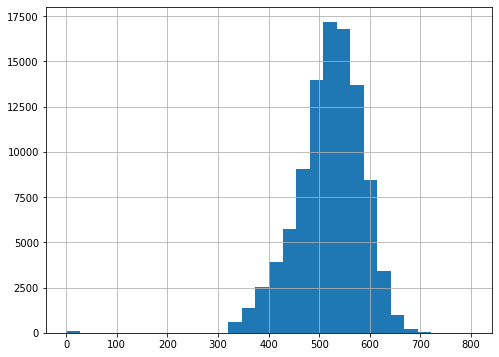

In [9]:
dados['NU_NOTA_LC'].hist(bins=30, figsize=(8,6))

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
dados['Q006'].unique()

array(['B', 'C', 'E', 'G', 'D', 'F', 'N', 'A', 'I', 'H', 'L', 'Q', 'M',
       'K', 'J', 'O', 'P'], dtype=object)

In [12]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 0, 'RENDA')

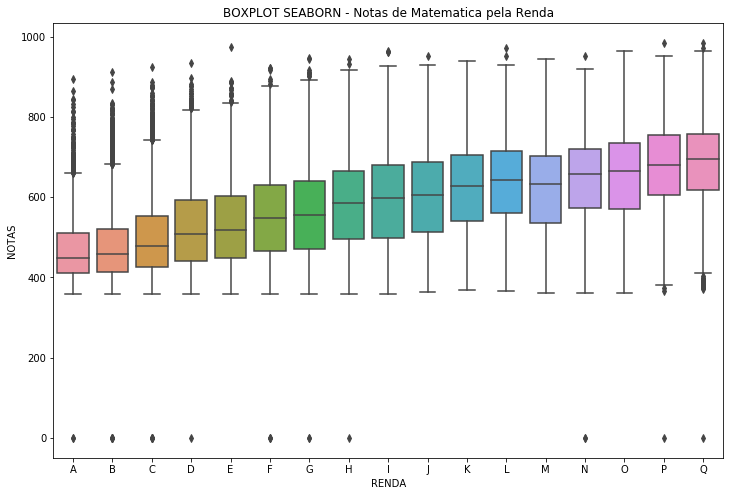

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Q006', y='NU_NOTA_MT', data=dados, order=renda_ordenada)
plt.title('BOXPLOT SEABORN - Notas de Matematica pela Renda')
plt.ylabel('NOTAS')
plt.xlabel('RENDA')

In [15]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 0, 'RENDA')

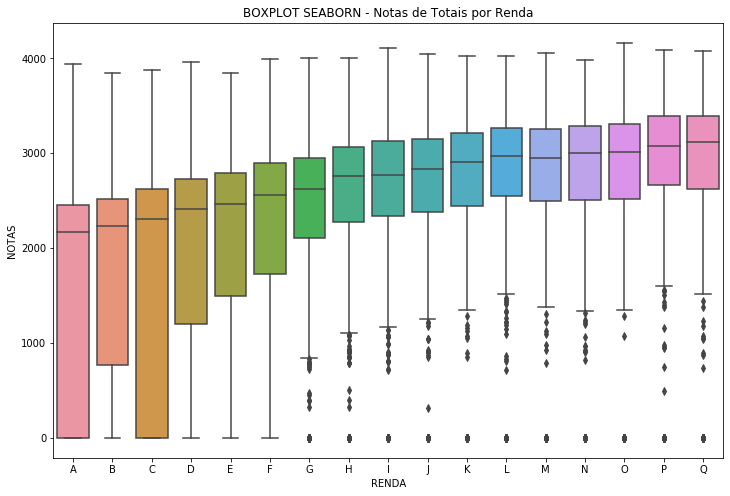

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Q006", y = dados['NU_NOTA_TOTAL'], data= dados, order=renda_ordenada)
plt.title('BOXPLOT SEABORN - Notas de Totais por Renda')
plt.ylabel('NOTAS')
plt.xlabel('RENDA')

In [21]:
sns.displot(dados, x= 'NU_NOTA_TOTAL')

AttributeError: module 'seaborn' has no attribute 'displot'

In [20]:
##
provas.append('NU_NOTA_TOTAL')
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [22]:
dados.query('NU_NOTA_TOTAL == 0')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,...,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,...,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,...,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,...,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,...,A,A,B,A,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127351,190006118552,2019,2604106,Caruaru,26,PE,20,F,1,1,...,A,A,D,A,A,E,A,B,B,0.0
127365,190006119756,2019,2302503,Brejo Santo,23,CE,22,F,1,3,...,A,A,B,A,A,B,A,A,A,0.0
127366,190006119783,2019,2304400,Fortaleza,23,CE,27,F,1,3,...,A,A,A,A,A,A,B,B,A,0.0
127368,190006119802,2019,2507507,João Pessoa,25,PB,18,M,1,2,...,A,B,B,A,A,C,A,A,B,0.0


In [31]:
##
#VARIAVEL NOVA
dado_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dado_sem_nota_zero[provas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5


# Aula 03

In [26]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000001BFCDE0F438>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    varia

# Aula 04

In [35]:
#Tentar prever a nota de Matemática

provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
prova_saida = 'NU_NOTA_MT'

In [36]:
dado_sem_nota_zero = dado_sem_nota_zero[provas].dropna()

notas_entrada = dado_sem_nota_zero[provas_entrada]
notas_saida = dado_sem_nota_zero[prova_saida]

x = notas_entrada
y = notas_saida

In [37]:
x

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
SEED = 4321
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [40]:
x_treino

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0
...,...,...,...,...
105608,578.4,580.4,476.0,660.0
45859,519.1,495.2,416.1,360.0
120397,514.4,516.6,547.7,620.0
3072,603.5,581.6,596.0,740.0


In [41]:
y_treino

90200     518.3
12375     428.8
46320     621.8
111208    514.6
75943     786.2
          ...  
105608    520.7
45859     443.7
120397    589.6
3072      624.8
11773     496.6
Name: NU_NOTA_MT, Length: 69402, dtype: float64

In [42]:
#SVM-SUpport Vector Machine / SVR-Suport Vector Regression
from sklearn.svm import LinearSVR

In [43]:
modelo = LinearSVR(random_state = SEED)

In [44]:
modelo.fit(x_treino, y_treino)

C:\Users\victor\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=4321, tol=0.0001, verbose=0)

In [45]:
predicoes_matematica = modelo.predict(x_teste)

In [46]:
y_teste

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
          ...  
81393     688.6
40159     479.1
64083     501.4
84661     772.5
79106     369.0
Name: NU_NOTA_MT, Length: 23135, dtype: float64

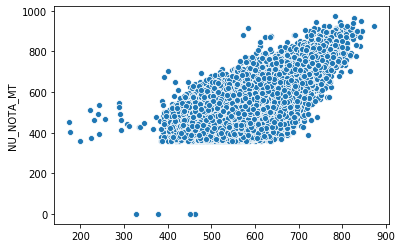

In [47]:
sns.scatterplot(x = predicoes_matematica, y = y_teste)

In [48]:
resultados = pd.DataFrame({'Real': y_teste,
                           'Previsao': predicoes_matematica,
                           'Diferença': (y_teste -predicoes_matematica),
                           'quadrado_diferenca': (y_teste- predicoes_matematica)**2
                           })
resultados

,Real,Previsao,Diferença,quadrado_diferenca
114991,459.7,596.911370,-137.211370,18826.960125
104685,617.2,660.155232,-42.955232,1845.151933
91028,520.0,540.723577,-20.723577,429.466633
115802,703.8,619.906875,83.893125,7038.056423
93303,627.1,612.041418,15.058582,226.760901
...,...,...,...,...
81393,688.6,654.402622,34.197378,1169.460694
40159,479.1,688.804783,-209.704783,43976.095989
64083,501.4,634.330211,-132.930211,17670.440912
84661,772.5,778.790939,-6.290939,39.575919


In [49]:
resultados['quadrado_diferenca'].mean()

8883.281087255811

In [50]:
import math
math.sqrt(resultados['quadrado_diferenca'].mean())

94.25115960695555

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(y_teste, predicoes_matematica)

8883.281087255815

# Aula 05

In [54]:
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematica_arvore)

6027.16690527297

In [55]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo_arvore, x, y, scoring='neg_mean_squared_error')


In [56]:
resultados

{'fit_time': array([0.11093235, 0.0829463 , 0.09008503, 0.07979178, 0.08522844]),
 'score_time': array([0.00399637, 0.00199866, 0.        , 0.00500512, 0.        ]),
 'test_score': array([-6317.91361711, -6390.69330384, -6519.97057993, -6702.12730215,
        -6851.82019408])}

In [63]:
media = (resultados['test_score']*-1).mean()
desvio_padrao = (resultados['test_score']*-1).std()
lim_inferior = media - (2 * desvio_padrao)
lim_superior = media + (2 * desvio_padrao)

print(f'Media:{media:.2f}, Desvio: {desvio_padrao:.2f}, Inferior:{lim_inferior}, Superior:{lim_superior} ')

Media:6556.50, Desvio: 197.06, Inferior:6162.377051503188, Superior:6950.632947334627 
